In [1]:
import grheat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'
%matplotlib ipympl

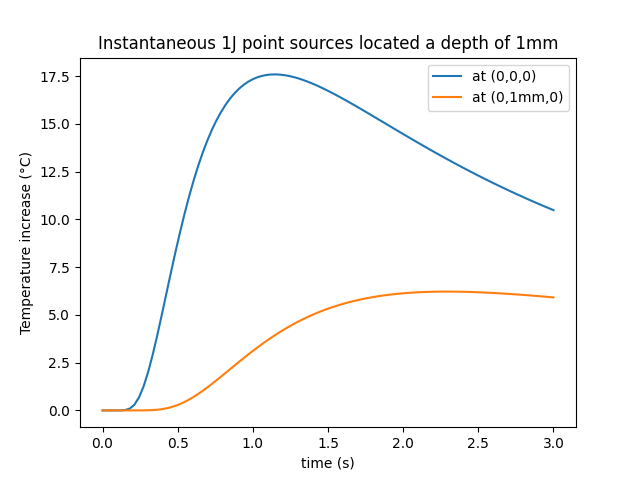

In [2]:
point = grheat.Point(0, 0, 0.001)
t = np.linspace(0,3,100)
tp = 0
T = point.instantaneous(0,0,0,t,tp)
plt.plot(t,T, label='at (0,0,0)')
T = point.instantaneous(0,1e-3,0,t,tp)
plt.plot(t,T, label='at (0,1mm,0)')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point sources located a depth of 1mm")
plt.show()

### Continuous flow across boundary

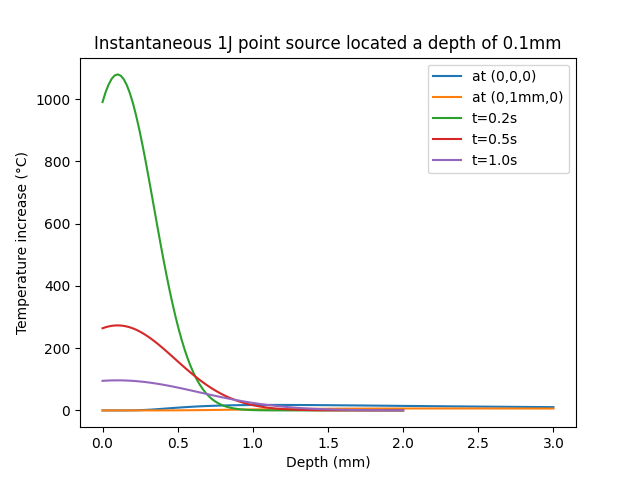

In [3]:
tp = 0
z0=0.0001
z = np.linspace(0,0.002,100)

point = grheat.Point(0, 0, z0)

for t in [0.2, 0.5, 1.0]:
    T = point.instantaneous(0,0,z,t,tp)
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(z0*1000))
plt.legend()
plt.show()

### Showing adiabatic boundary condition

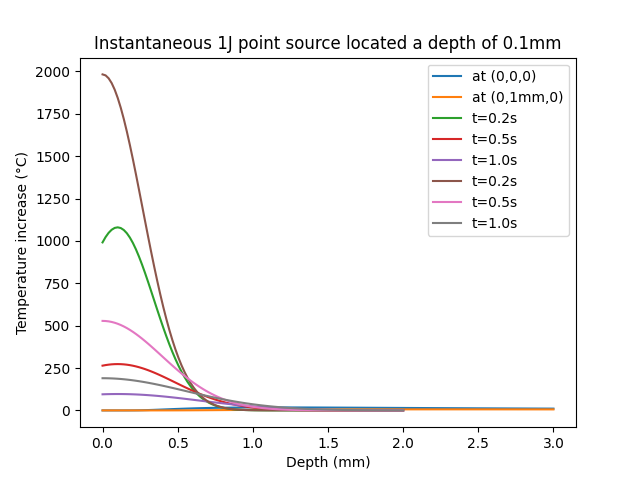

In [4]:
tp = 0
z0=0.0001
z = np.linspace(0,0.002,100)

point = grheat.Point(0, 0, z0, boundary='adiabatic')

for t in [0.2, 0.5, 1.0]:
    T = point.instantaneous(0,0,z,t,tp)
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(z0*1000))
plt.legend()
plt.show()

### Showing zero boundary condition

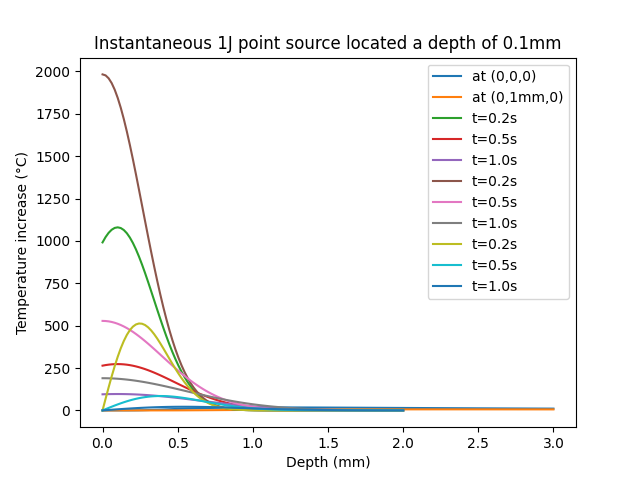

In [5]:
tp = 0
z0=0.0001
z = np.linspace(0,0.002,100)

point = grheat.Point(0, 0, z0, boundary='zero')

for t in [0.2, 0.5, 1.0]:
    T = point.instantaneous(0,0,z,t,tp)
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(z0*1000))
plt.legend()
plt.show()

In [3]:
tp = 0                          # seconds
t = np.linspace(0.000, 0.2, 21) # seconds
xp, yp, zp = 0, 0.0001, 0.001   # m
x = 0                           # m
y = 0                           # m
z = np.linspace(0,0.002,101)    # m
zz = 1000 * z                   # mm

point = grheat.Point(xp, yp, zp, boundary='zero')
T_data = point.instantaneous(x,y,z,z[50],tp)

# Create figure and axis
fig, ax = plt.subplots()

# need a line object from the graph that will be continually updated
ln, = plt.plot(zz, T_data)

def init():
    plt.xlabel("Depth (mm)")
    plt.ylabel('Temperature increase (°C)')
    plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(zp*1000))
    plt.xlim(zz[0],zz[-1])
    return ln,

def update(t):
    T_data = point.instantaneous(0,0,z,t,tp)    
    ln.set_ydata(T_data)
    
    # Autoscale the vertical axis
    ax.relim()
    ax.autoscale_view()
    return ln,

# Create animation
ani = FuncAnimation(fig, update, frames=t, init_func=init, 
                    blit=True, interval=100, repeat=False)

# Close the figure window to prevent the static plot from being displayed
plt.close(fig)

# Display the animation in the Jupyter Notebook
HTML(ani.to_jshtml())



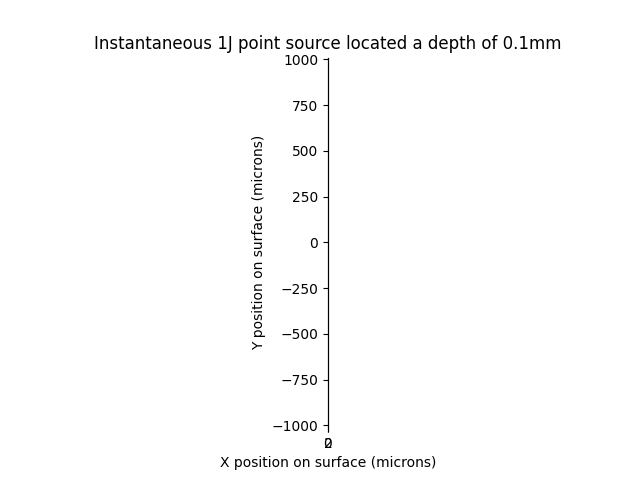

In [7]:
xp, yp, zp = 0, 0, 0.0001      # meters

point = grheat.Point(xp, yp, zp, boundary='adiabatic')
t_pulse = 1
t = 1.1
arr = np.linspace(-1,1,100) * 0.001
X, Y = np.meshgrid(arr, arr)
T = point.pulsed(X, Y, 0, t, t_pulse)
plt.pcolormesh(X*1e6, Y*1e6, T)
plt.xlabel("X position on surface (microns)")
plt.ylabel("Y position on surface (microns)")
plt.gca().set_aspect(1)
plt.show()

In [8]:
tp = 0.1

xp, yp, zp = 0, 0, 0
x, y, z = 0.001, 0.001, 0.001
point = grheat.Point(xp, yp, zp)

print("t_pulse     T2     T1")
for t_pulse in [0.0001, 0.001, 0.01, 0.1, 0.99]:
    T1 = point.instantaneous(x, y, z, tp, t_pulse)
    T2 = point.pulsed(x, y, z, tp, t_pulse)
    print("%.4f  %.4f %.4f" %(t_pulse, T2, T1))

t_pulse     T2     T1
0.0001  0.0000 0.0000
0.0010  0.0000 0.0000
0.0100  0.0000 0.0000
0.1000  0.0000 0.0000
0.9900  0.0000 0.0000
